# Pima Project

In [49]:
!pip install miceforest

     ---------------------------------------- 0.0/43.9 kB ? eta -:--:--
     --------- ------------------------------ 10.2/43.9 kB ? eta -:--:--
     -------------------------- ----------- 30.7/43.9 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 43.9/43.9 kB 309.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/58.2 kB ? eta -:--:--
   ----------------------------------- ---- 51.2/58.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 58.2/58.2 kB 773.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------------ --------------------------- 0.4/1.3 MB 13.2 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 16.9 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 14.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------  1.7/1.7 MB 53.2 MB/s eta 0:00:01
   ------------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('pima.csv')
na_counts = data.isna().sum()
print(na_counts)
data

pregnant      0
glucose       5
pressure     35
triceps     227
insulin     374
mass         11
pedigree      0
age           0
diabetes      0
dtype: int64


pregnant  glucose  pressure  triceps  insulin  mass  pedigree  age  \
0           6    148.0      72.0     35.0      NaN  33.6     0.627   50   
1           1     85.0      66.0     29.0      NaN  26.6     0.351   31   
2           8    183.0      64.0      NaN      NaN  23.3     0.672   32   
3           1     89.0      66.0     23.0     94.0  28.1     0.167   21   
4           0    137.0      40.0     35.0    168.0  43.1     2.288   33   
..        ...      ...       ...      ...      ...   ...       ...  ...   
763        10    101.0      76.0     48.0    180.0  32.9     0.171   63   
764         2    122.0      70.0     27.0      NaN  36.8     0.340   27   
765         5    121.0      72.0     23.0    112.0  26.2     0.245   30   
766         1    126.0      60.0      NaN      NaN  30.1     0.349   47   
767         1     93.0      70.0     31.0      NaN  30.4     0.315   23   

    diabetes  
0        pos  
1        neg  
2        pos  
3        neg  
4        pos  
..       ...  
763      neg  
764      neg  
765      neg  
766      pos  
767      neg  

[768 rows x 9 columns]

c:\Users\darth\anaconda3\envs\newstat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\darth\anaconda3\envs\newstat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\darth\anaconda3\envs\newstat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\darth\anaconda3\envs\newstat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

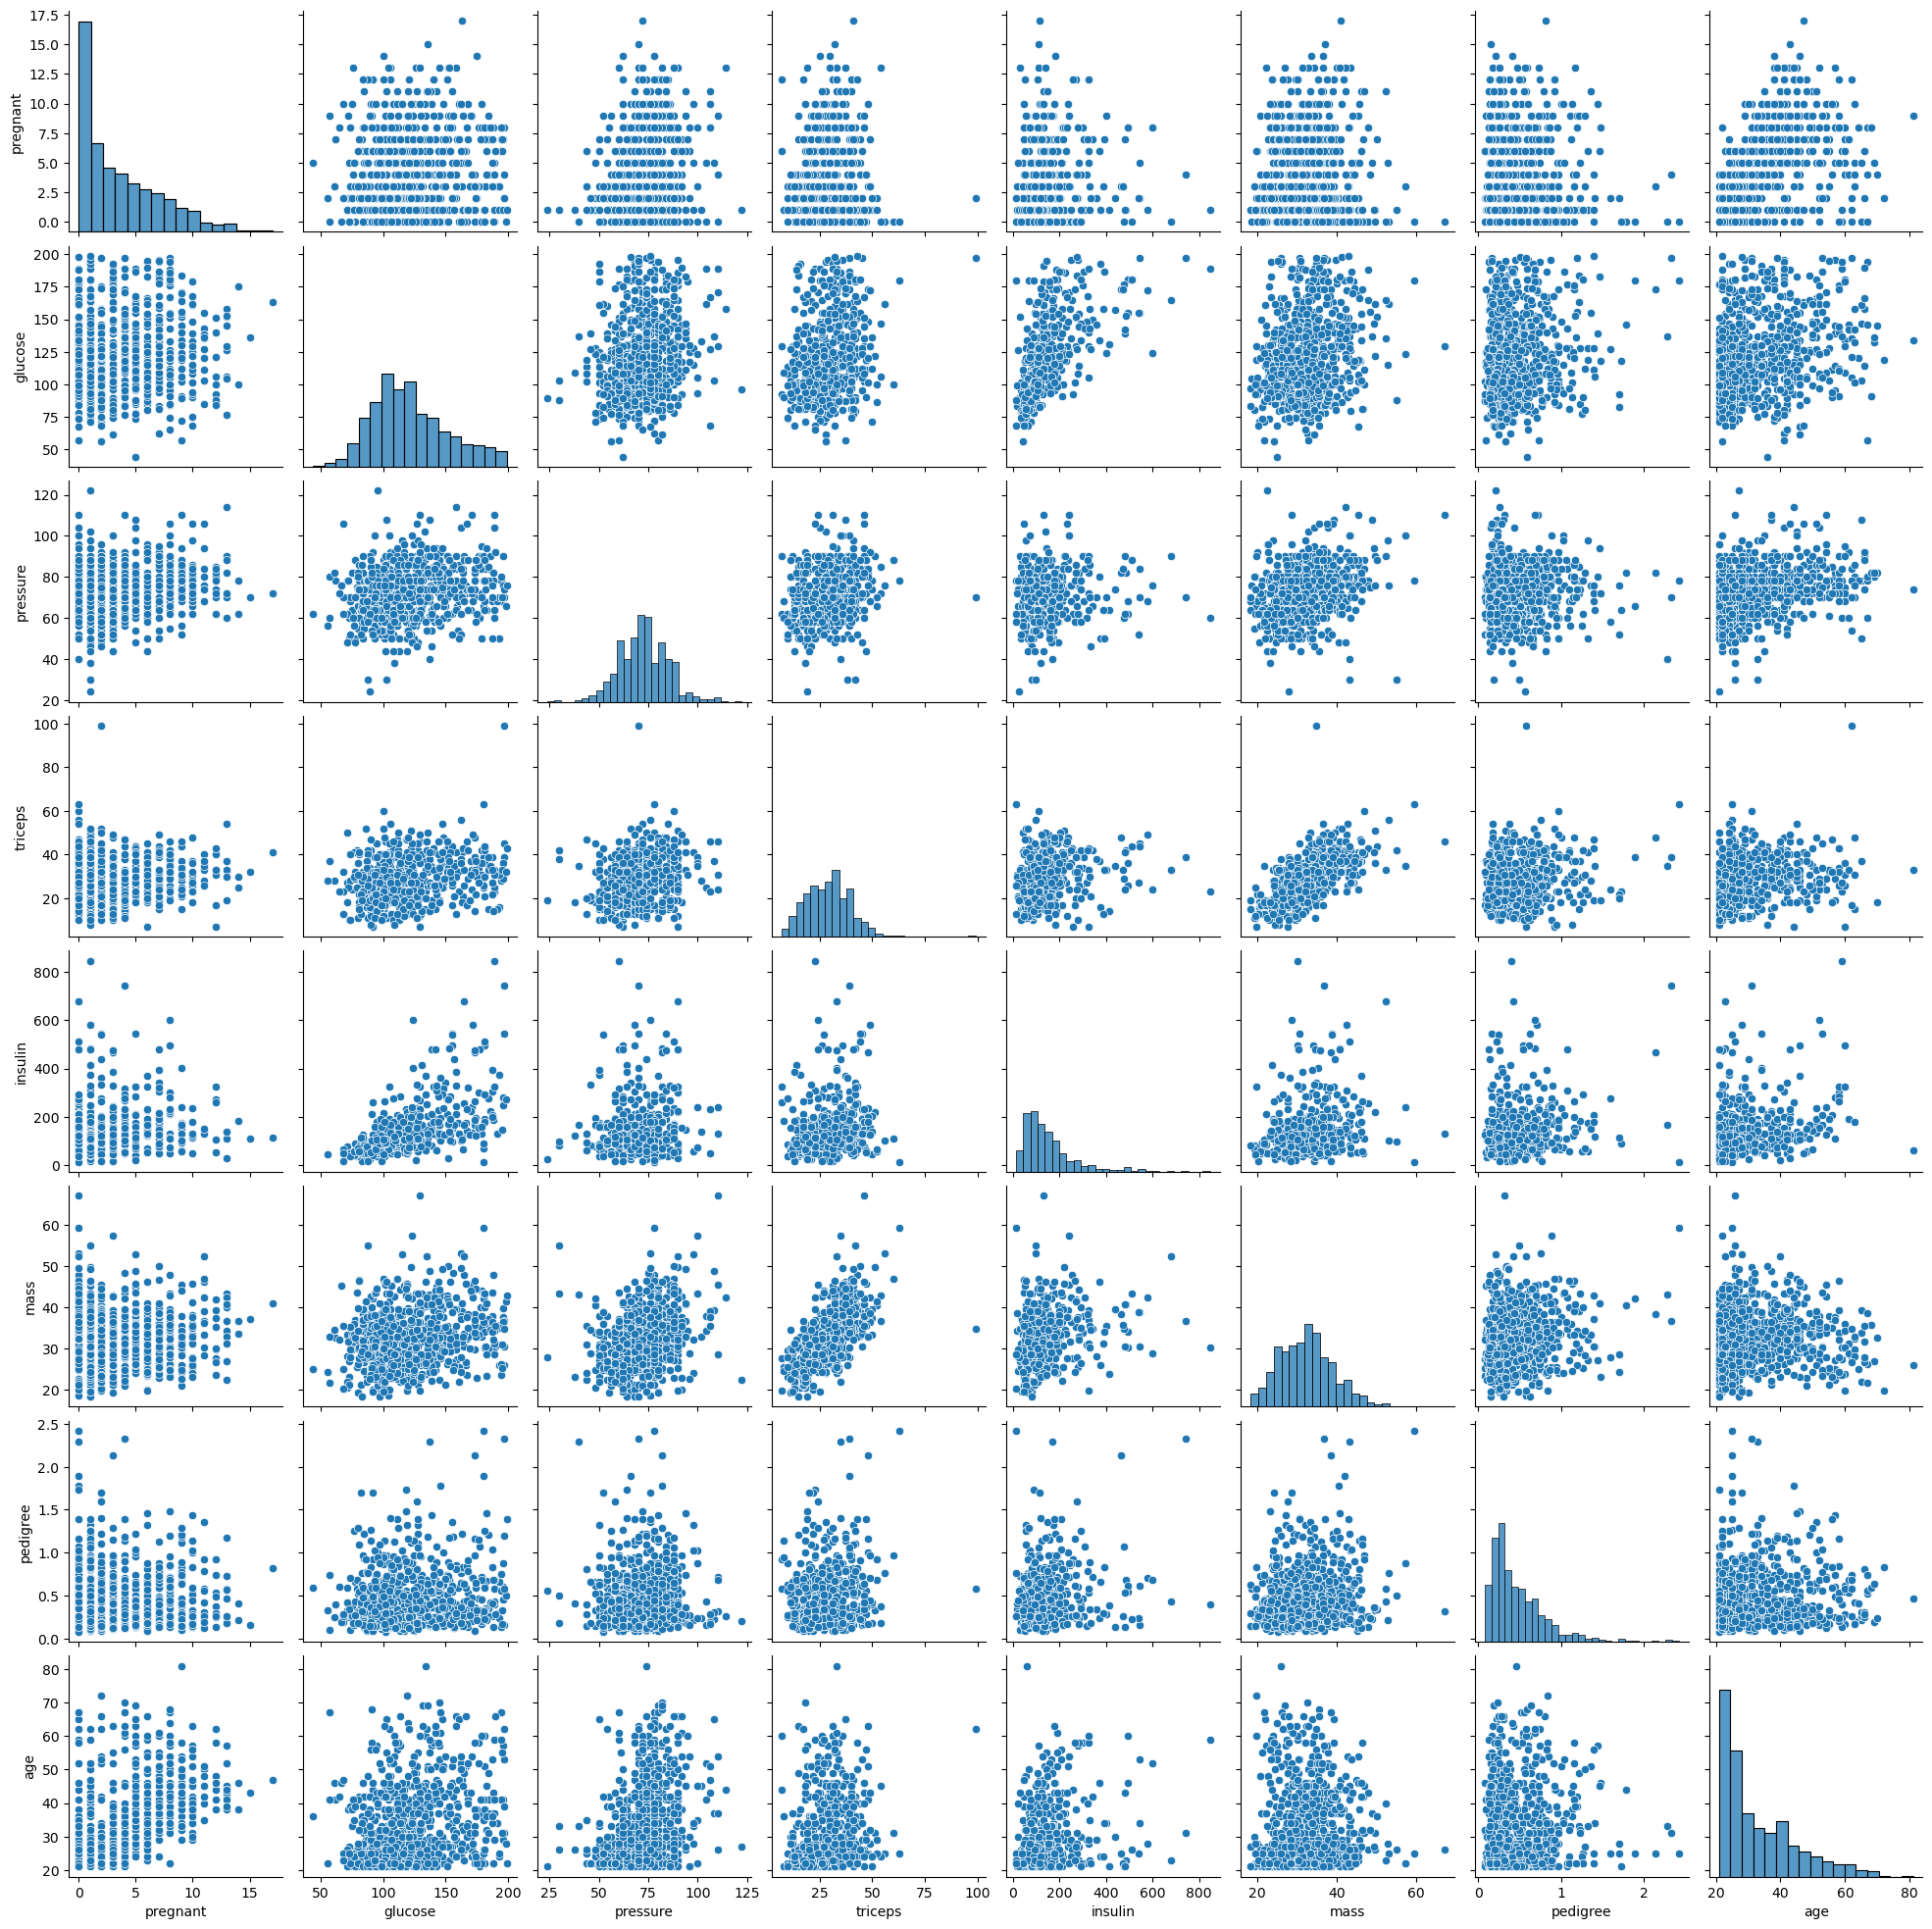

In [159]:
#plot pairwise plot of data
sns.pairplot(data.drop("diabetes", axis=1))

In [84]:
#transform the data with log
data_log = data.copy()
data_log['insulin'] = np.log(data_log['insulin'])
data_log['pedigree'] = np.log(data_log['pedigree'])
data_log['age'] = np.log(data_log['age'])
data_log['pregnant'] = np.log(data_log['pregnant'] + 1)

#drop the outlier in triceps
data_log = data_log.drop(data_log['triceps'].idxmax())
data_log.index = range(len(data_log))
data_log

pregnant  glucose  pressure  triceps   insulin  mass  pedigree       age  \
0    1.945910    148.0      72.0     35.0       NaN  33.6 -0.466809  3.912023   
1    0.693147     85.0      66.0     29.0       NaN  26.6 -1.046969  3.433987   
2    2.197225    183.0      64.0      NaN       NaN  23.3 -0.397497  3.465736   
3    0.693147     89.0      66.0     23.0  4.543295  28.1 -1.789761  3.044522   
4    0.000000    137.0      40.0     35.0  5.123964  43.1  0.827678  3.496508   
..        ...      ...       ...      ...       ...   ...       ...       ...   
762  2.397895    101.0      76.0     48.0  5.192957  32.9 -1.766092  4.143135   
763  1.098612    122.0      70.0     27.0       NaN  36.8 -1.078810  3.295837   
764  1.791759    121.0      72.0     23.0  4.718499  26.2 -1.406497  3.401197   
765  0.693147    126.0      60.0      NaN       NaN  30.1 -1.052683  3.850148   
766  0.693147     93.0      70.0     31.0       NaN  30.4 -1.155183  3.135494   

    diabetes  
0        pos  
1        neg  
2        pos  
3        neg  
4        pos  
..       ...  
762      neg  
763      neg  
764      neg  
765      pos  
766      neg  

[767 rows x 9 columns]

In [85]:
#compare correlations

x = data.drop("diabetes", axis=1)
print(x.corr())

xl = data_log.drop("diabetes", axis=1)
print(xl.corr())

          pregnant   glucose  pressure   triceps   insulin      mass  \
pregnant  1.000000  0.128135  0.214178  0.100239  0.082171  0.021719   
glucose   0.128135  1.000000  0.223192  0.228043  0.581186  0.232771   
pressure  0.214178  0.223192  1.000000  0.226839  0.098272  0.289230   
triceps   0.100239  0.228043  0.226839  1.000000  0.184888  0.648214   
insulin   0.082171  0.581186  0.098272  0.184888  1.000000  0.228050   
mass      0.021719  0.232771  0.289230  0.648214  0.228050  1.000000   
pedigree -0.033523  0.137246 -0.002805  0.115016  0.130395  0.155382   
age       0.544341  0.267136  0.330107  0.166816  0.220261  0.025841   

          pedigree       age  
pregnant -0.033523  0.544341  
glucose   0.137246  0.267136  
pressure -0.002805  0.330107  
triceps   0.115016  0.166816  
insulin   0.130395  0.220261  
mass      0.155382  0.025841  
pedigree  1.000000  0.033561  
age       0.033561  1.000000  
          pregnant   glucose  pressure   triceps   insulin      mass  \


c:\Users\darth\anaconda3\envs\newstat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\darth\anaconda3\envs\newstat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\darth\anaconda3\envs\newstat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\darth\anaconda3\envs\newstat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

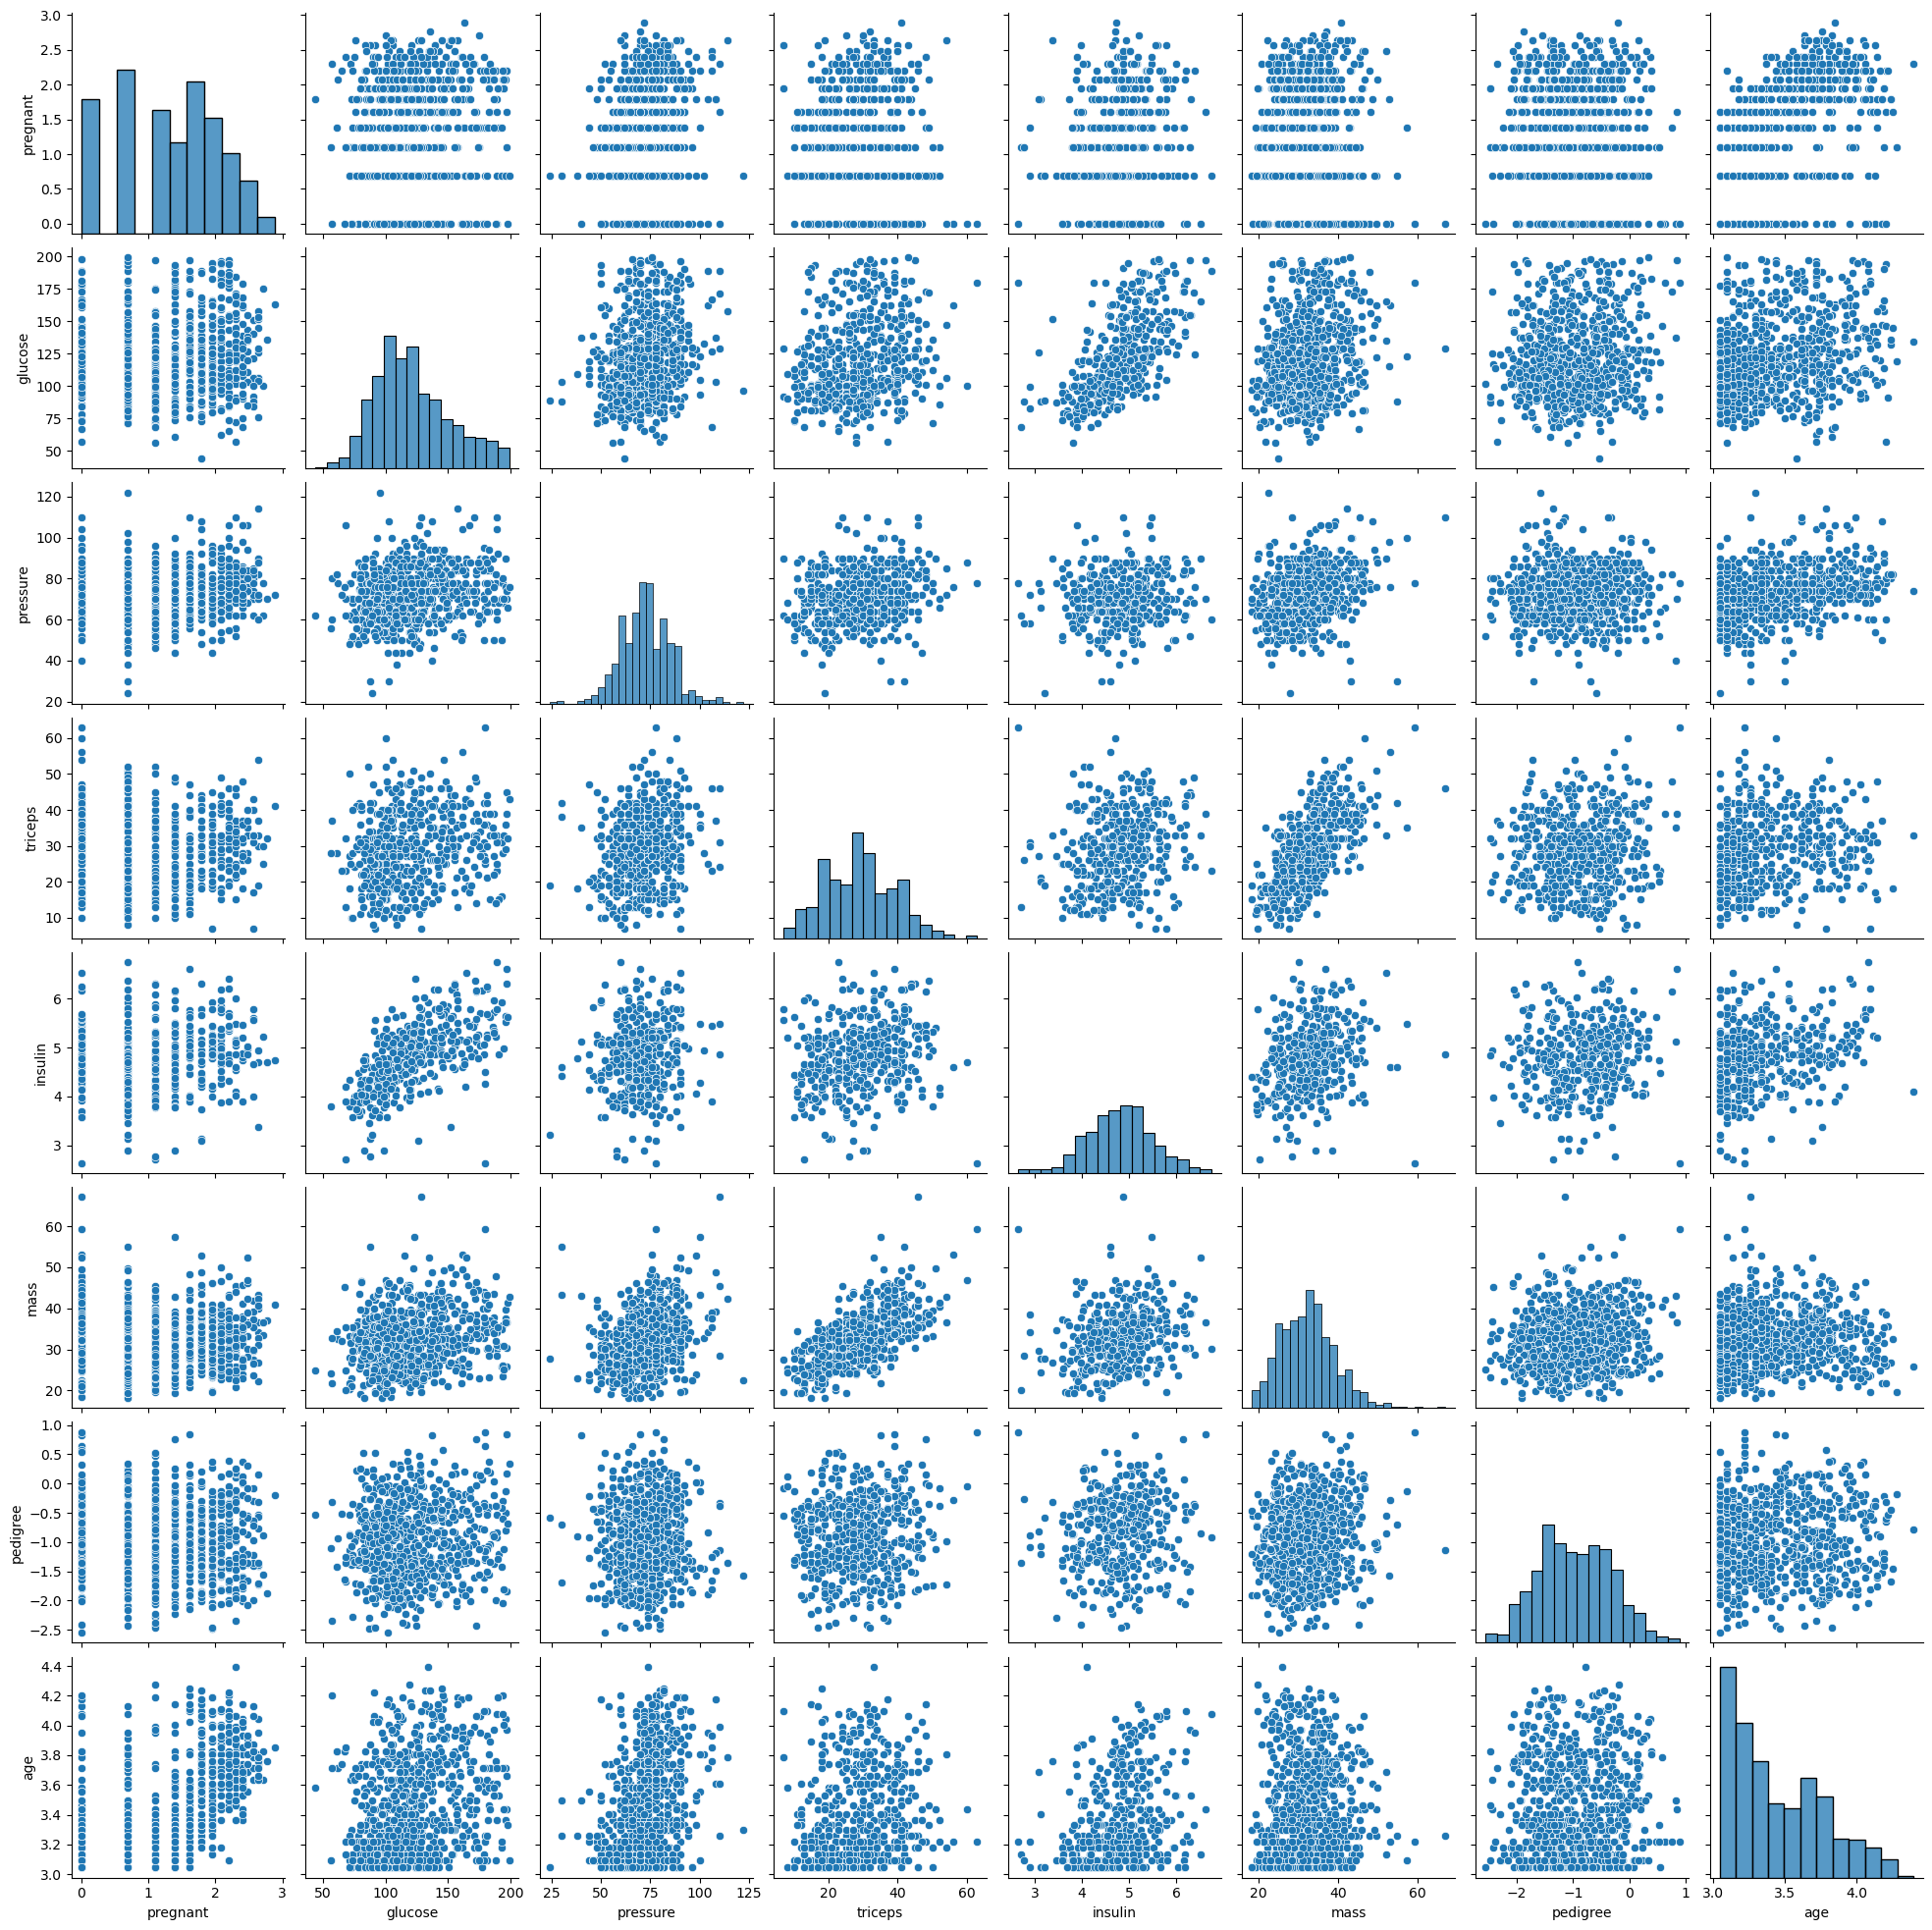

In [144]:
#plot transformed data
sns.pairplot(data_log.drop("diabetes", axis=1))

In [91]:
#impute NaN values (method 1)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()

data_imputed = pd.DataFrame(imputer.fit_transform(xl), columns=xl.columns)

data_imputed['diabetes'] = data['diabetes']
ii_imputed_df = data_imputed
ii_imputed_df

pregnant  glucose  pressure    triceps   insulin  mass  pedigree  \
0    1.945910    148.0      72.0  35.000000  5.163129  33.6 -0.466809   
1    0.693147     85.0      66.0  29.000000  4.239849  26.6 -1.046969   
2    2.197225    183.0      64.0  21.036572  5.522523  23.3 -0.397497   
3    0.693147     89.0      66.0  23.000000  4.543295  28.1 -1.789761   
4    0.000000    137.0      40.0  35.000000  5.123964  43.1  0.827678   
..        ...      ...       ...        ...       ...   ...       ...   
762  2.397895    101.0      76.0  48.000000  5.192957  32.9 -1.766092   
763  1.098612    122.0      70.0  27.000000  4.842472  36.8 -1.078810   
764  1.791759    121.0      72.0  23.000000  4.718499  26.2 -1.406497   
765  0.693147    126.0      60.0  26.082528  4.841017  30.1 -1.052683   
766  0.693147     93.0      70.0  31.000000  4.383328  30.4 -1.155183   

          age diabetes  
0    3.912023      pos  
1    3.433987      neg  
2    3.465736      pos  
3    3.044522      neg  
4    3.496508      pos  
..        ...      ...  
762  4.143135      neg  
763  3.295837      neg  
764  3.401197      neg  
765  3.850148      neg  
766  3.135494      pos  

[767 rows x 9 columns]

In [87]:
#method 2
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3, weights="uniform")
knn_imputed = imputer.fit_transform(xl)
knn_imputed_df = pd.DataFrame(imputer.fit_transform(xl), columns=xl.columns)
knn_imputed_df['diabetes'] = data['diabetes']
knn_imputed_df

pregnant  glucose  pressure    triceps   insulin  mass  pedigree  \
0    1.945910    148.0      72.0  35.000000  5.431875  33.6 -0.466809   
1    0.693147     85.0      66.0  29.000000  4.489805  26.6 -1.046969   
2    2.197225    183.0      64.0  30.666667  6.242967  23.3 -0.397497   
3    0.693147     89.0      66.0  23.000000  4.543295  28.1 -1.789761   
4    0.000000    137.0      40.0  35.000000  5.123964  43.1  0.827678   
..        ...      ...       ...        ...       ...   ...       ...   
762  2.397895    101.0      76.0  48.000000  5.192957  32.9 -1.766092   
763  1.098612    122.0      70.0  27.000000  4.994277  36.8 -1.078810   
764  1.791759    121.0      72.0  23.000000  4.718499  26.2 -1.406497   
765  0.693147    126.0      60.0  18.666667  5.333610  30.1 -1.052683   
766  0.693147     93.0      70.0  31.000000  4.116978  30.4 -1.155183   

          age diabetes  
0    3.912023      pos  
1    3.433987      neg  
2    3.465736      pos  
3    3.044522      neg  
4    3.496508      pos  
..        ...      ...  
762  4.143135      neg  
763  3.295837      neg  
764  3.401197      neg  
765  3.850148      neg  
766  3.135494      pos  

[767 rows x 9 columns]

In [88]:
#method 3
import miceforest as mf
xl2 = xl.copy()
rf_impute = mf.ImputationKernel(xl2, datasets=5, save_all_iterations=True, random_state=42)
rf_impute.mice(5)
rf_imputed_df = rf_impute.complete_data(0)
rf_imputed_df['diabetes'] = data['diabetes']
rf_imputed_df

pregnant  glucose  pressure  triceps   insulin  mass  pedigree       age  \
0    1.945910    148.0      72.0     35.0  5.393628  33.6 -0.466809  3.912023   
1    0.693147     85.0      66.0     29.0  3.871201  26.6 -1.046969  3.433987   
2    2.197225    183.0      64.0     25.0  5.521461  23.3 -0.397497  3.465736   
3    0.693147     89.0      66.0     23.0  4.543295  28.1 -1.789761  3.044522   
4    0.000000    137.0      40.0     35.0  5.123964  43.1  0.827678  3.496508   
..        ...      ...       ...      ...       ...   ...       ...       ...   
762  2.397895    101.0      76.0     48.0  5.192957  32.9 -1.766092  4.143135   
763  1.098612    122.0      70.0     27.0  5.204007  36.8 -1.078810  3.295837   
764  1.791759    121.0      72.0     23.0  4.718499  26.2 -1.406497  3.401197   
765  0.693147    126.0      60.0     20.0  5.043425  30.1 -1.052683  3.850148   
766  0.693147     93.0      70.0     31.0  4.317488  30.4 -1.155183  3.135494   

    diabetes  
0        pos  
1        neg  
2        pos  
3        neg  
4        pos  
..       ...  
762      neg  
763      neg  
764      neg  
765      neg  
766      pos  

[767 rows x 9 columns]

In [92]:
import pandas as pd
#method 4, average all of the imputation methods

something = ii_imputed_df.drop('diabetes', axis=1).add(rf_imputed_df.drop('diabetes', axis=1))
df = something/2
df['diabetes'] = rf_imputed_df['diabetes']
df

pregnant  glucose  pressure    triceps   insulin  mass  pedigree  \
0    1.945910    148.0      72.0  35.000000  5.278378  33.6 -0.466809   
1    0.693147     85.0      66.0  29.000000  4.055525  26.6 -1.046969   
2    2.197225    183.0      64.0  23.018286  5.521992  23.3 -0.397497   
3    0.693147     89.0      66.0  23.000000  4.543295  28.1 -1.789761   
4    0.000000    137.0      40.0  35.000000  5.123964  43.1  0.827678   
..        ...      ...       ...        ...       ...   ...       ...   
762  2.397895    101.0      76.0  48.000000  5.192957  32.9 -1.766092   
763  1.098612    122.0      70.0  27.000000  5.023240  36.8 -1.078810   
764  1.791759    121.0      72.0  23.000000  4.718499  26.2 -1.406497   
765  0.693147    126.0      60.0  23.041264  4.942221  30.1 -1.052683   
766  0.693147     93.0      70.0  31.000000  4.350408  30.4 -1.155183   

          age diabetes  
0    3.912023      pos  
1    3.433987      neg  
2    3.465736      pos  
3    3.044522      neg  
4    3.496508      pos  
..        ...      ...  
762  4.143135      neg  
763  3.295837      neg  
764  3.401197      neg  
765  3.850148      neg  
766  3.135494      pos  

[767 rows x 9 columns]

c:\Users\darth\anaconda3\envs\newstat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\darth\anaconda3\envs\newstat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\darth\anaconda3\envs\newstat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\darth\anaconda3\envs\newstat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

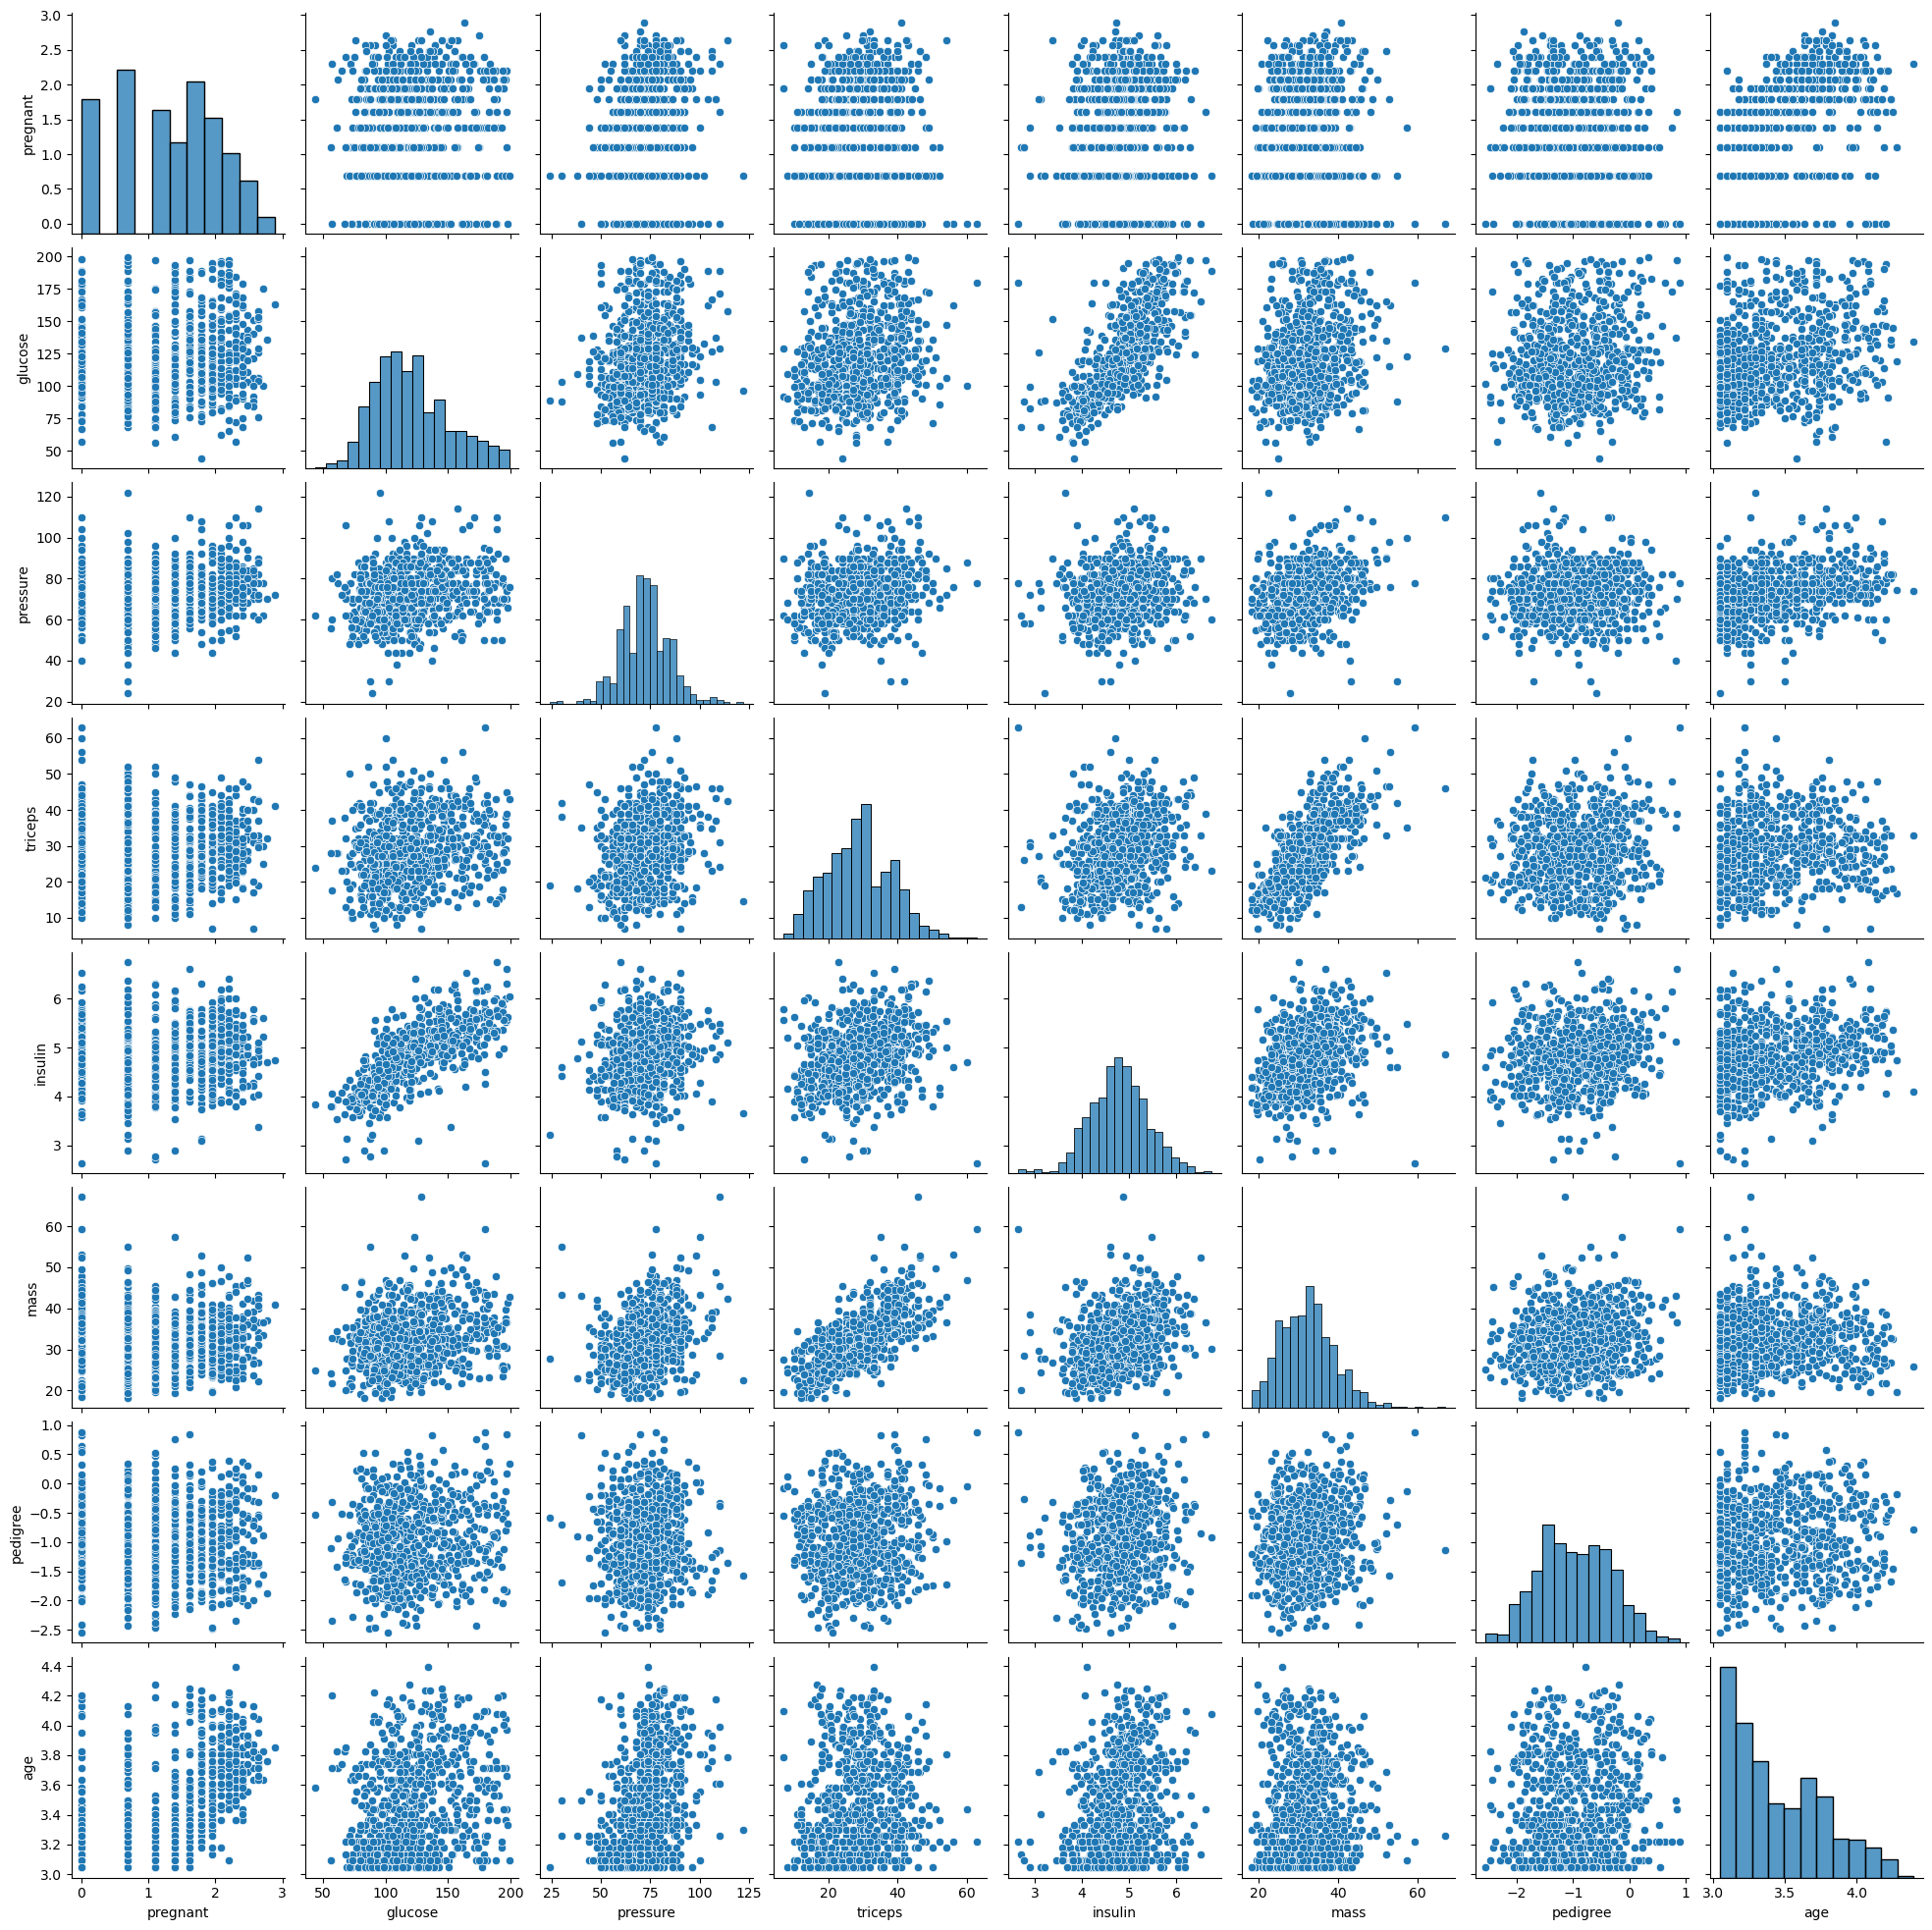

In [93]:
#graph everything with imputed NaN values
sns.pairplot(df.drop("diabetes", axis=1))

c:\Users\darth\anaconda3\envs\newstat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


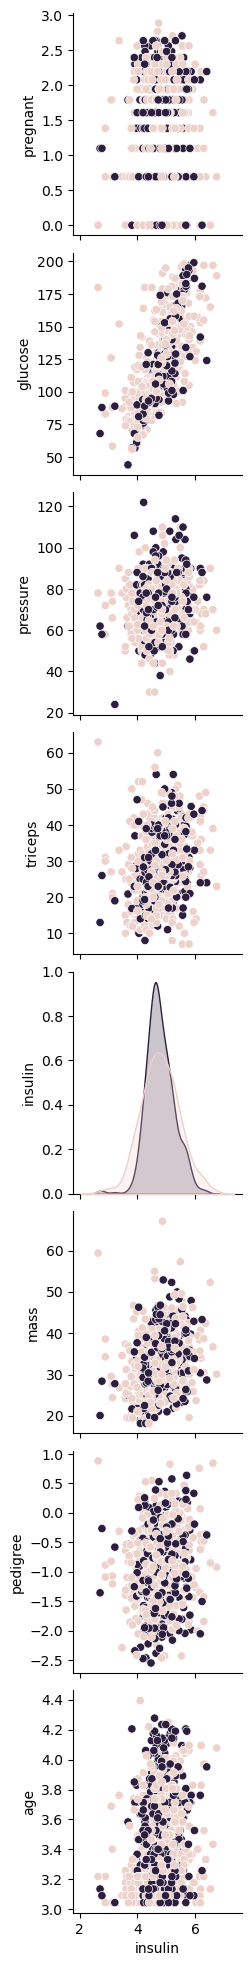

In [39]:
#Graph imputed insulin values vs. non-imputed insulin values
i_data_log = data_log.copy()

#setup a true/false for if the insulin value is NaN in transformed
i_df = df.copy()
i_df['is_insulin_nan'] = i_data_log['insulin'].isna()

#graph the rows that are imputed values for insulin in black, the rest of the data is orange.
sns.pairplot(i_df, hue='is_insulin_nan', x_vars=['insulin'], y_vars=['pregnant', 'glucose', 'pressure', 'triceps', 'insulin', 'mass', 'pedigree', 'age'])._legend.remove()

c:\Users\darth\anaconda3\envs\newstat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


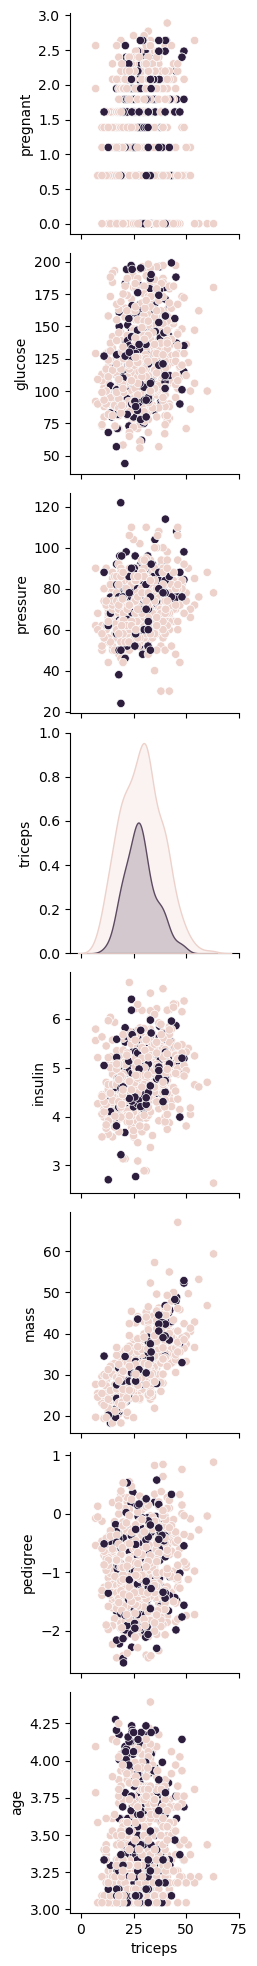

In [38]:
#Graph imputed tricep values vs. non-imputed tricep values
t_data_log = data_log.copy()
#setup a true/false for if the tricep value is NaN in transformed
t_df = df.copy()
t_df['is_triceps_nan'] = t_data_log['triceps'].isna()


#graph the rows that are imputed values for tricep in black, the rest of the data is orange.
sns.pairplot(t_df, hue='is_triceps_nan', x_vars=['triceps'], y_vars=['pregnant', 'glucose', 'pressure', 'triceps', 'insulin', 'mass', 'pedigree', 'age'])._legend.remove()

c:\Users\darth\anaconda3\envs\newstat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


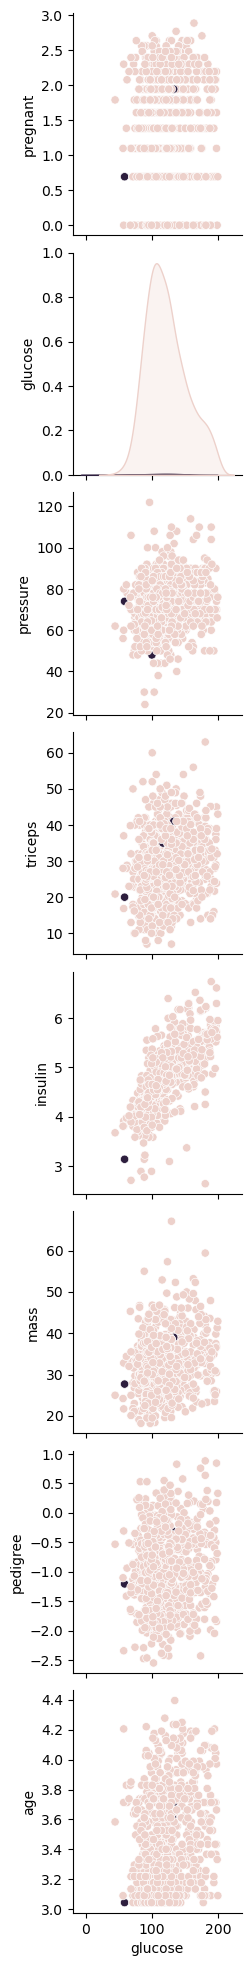

In [37]:
#Graph imputed glucose values vs. non-imputed glucose values
g_data_log = data_log.copy()
#setup a true/false for if the tricep value is NaN in transformed
g_df = df.copy()
g_df['is_glucose_nan'] = g_data_log['glucose'].isna()

#graph the rows that are imputed values for glucose in black, the rest of the data is orange.
sns.pairplot(g_df, hue='is_glucose_nan', x_vars=['glucose'], y_vars=['pregnant', 'glucose', 'pressure', 'triceps', 'insulin', 'mass', 'pedigree', 'age'])._legend.remove()

c:\Users\darth\anaconda3\envs\newstat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


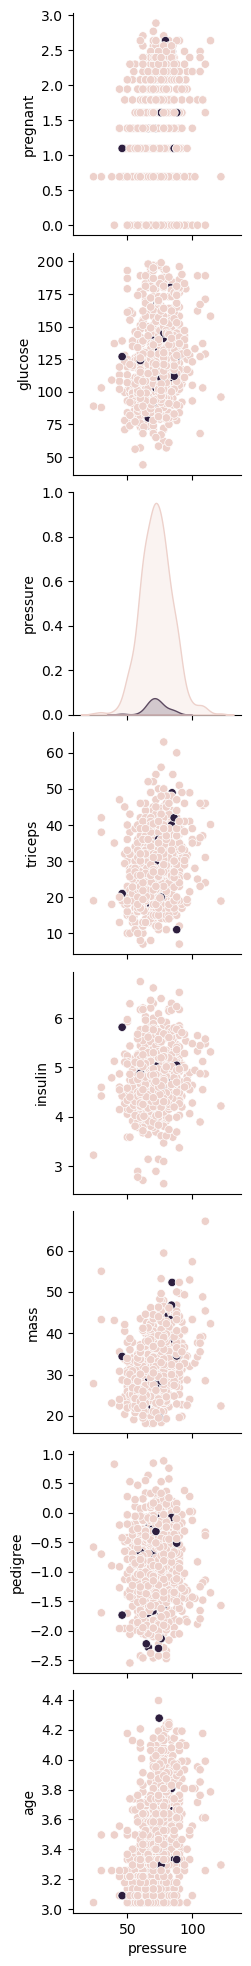

In [36]:
#Graph imputed pressure values vs. non-imputed pressure values
p_data_log = data_log.copy()
#setup a true/false for if the pressure value is NaN in transformed
p_df = df.copy()
p_df['is_pressure_nan'] = p_data_log['pressure'].isna()

#graph the rows that are imputed values for pressure in black, the rest of the data is orange.
sns.pairplot(p_df, hue='is_pressure_nan', x_vars=['pressure'], y_vars=['pregnant', 'glucose', 'pressure', 'triceps', 'insulin', 'mass', 'pedigree', 'age'])._legend.remove()

c:\Users\darth\anaconda3\envs\newstat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


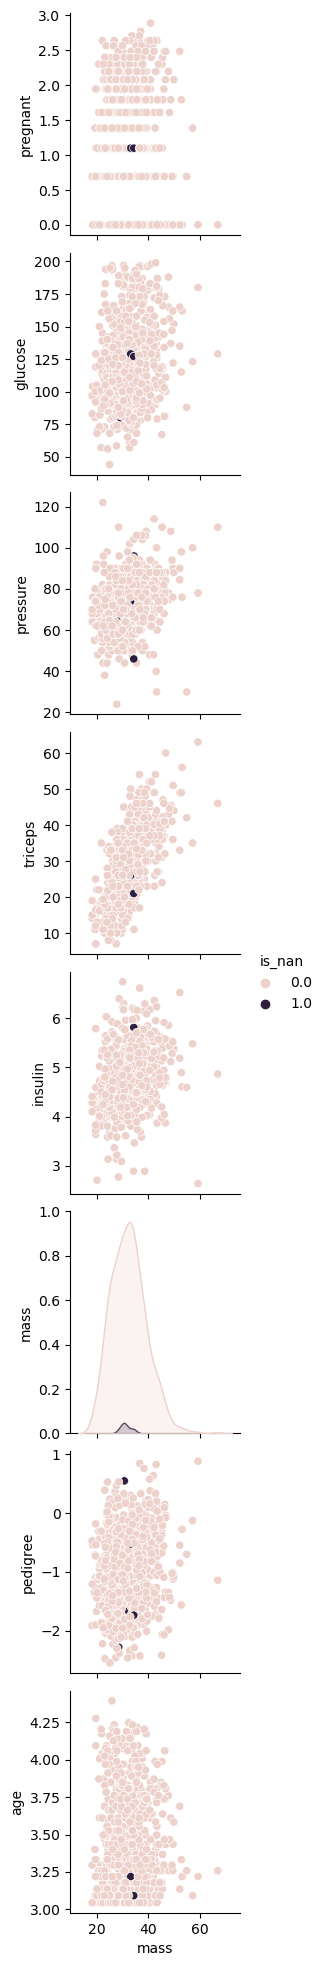

In [41]:
#Graph imputed mass values vs. non-imputed mass values
m_data_log = data_log.copy()
#setup a true/false for if the mass value is NaN in transformed
m_df = df.copy()
m_df['is_nan'] = m_data_log['mass'].isna()

#graph the rows that are imputed values for mass in black, the rest of the data is orange.
sns.pairplot(m_df, hue='is_nan', x_vars=['mass'], y_vars=['pregnant', 'glucose', 'pressure', 'triceps', 'insulin', 'mass', 'pedigree', 'age'])

In [48]:
#combine the images showing the imputed values

from PIL import Image
from PIL import Image
# Open the images
image1 = Image.open('1.png')
image2 = Image.open('2.png')
image3 = Image.open('3.png')
image4 = Image.open('4.png')
image5 = Image.open('5.png')

# Create a new image with the combined size
combined_image = Image.new("RGB", (image1.width + image2.width + image3.width + image4.width + image5.width, image1.height))

# Paste the first image on the left side
combined_image.paste(image3, (0, 0))

# Paste the second image on the right side
combined_image.paste(image4, (image3.width, 0))

# Paste the third image on the right side
combined_image.paste(image2, (image3.width + image4.width, 0))

# Paste the fourth image on the right side
combined_image.paste(image1, (image4.width + image2.width + image3.width, 0))

# Paste the fifth image on the right side
combined_image.paste(image5, (image1.width + image2.width + image3.width + image4.width, 0))

#save the combined image
#combined_image.save("combined_image.jpg")
combined_image.show()

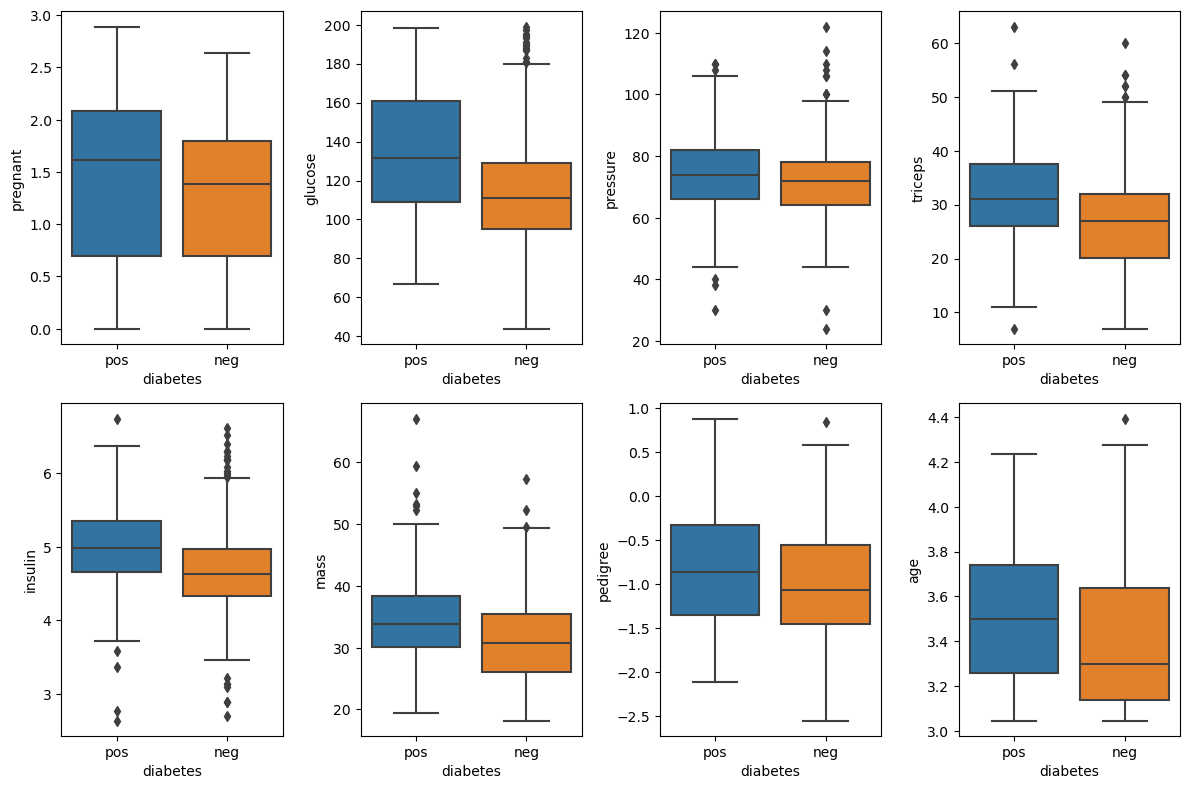

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))

# Iterate over each variable and create a boxplot
for i, column in enumerate(df.columns[:-1]):
    row = i // 4
    col = i % 4
    sns.boxplot(x='diabetes', y=column, data=df, ax=axes[row, col])

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()

In [235]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Define the target variable
target = df['diabetes']

# Define the predictor variables
predictors = df.drop('diabetes', axis=1)
# Create an instance of StandardScaler
scaler = StandardScaler()

# Standardize the predictors
predictors_standard = scaler.fit_transform(predictors)

# Fit the GLM model
model = LogisticRegression()
model.fit(predictors_standard, target)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Perform cross-validation
cv_scores = cross_val_score(model, predictors_standard, target, cv=10)

print("Mean cross-validation score:", cv_scores.mean())


y_pred = cross_val_predict(model, predictors_standard, target, cv=10)
cm = confusion_matrix(target, y_pred)
cm

Coefficients: [[ 0.16862929  0.57857107 -0.10980964  0.24033774  0.06511417  0.21320348
   0.21334525  0.10986807]]
Intercept: [-0.73033387]
Mean cross-validation score: 0.7061688311688312


array([[432,  67],
       [158, 110]], dtype=int64)